# Assignment 1: Decision Tree Grid Search
## DTSC 680: Applied Machine Learning

## Name: Betty Tai

## Directions

The main purpose of this assignment is for you to gain experience sweeping a problem's parameter space - in this case by performing a grid search.  Doing so allows you to identify the optimal hyperparameter values to be used for training your model.

## Preliminaries

Let's import some common packages:

In [16]:
import numpy as np
from sklearn import datasets

## Load and Split Iris Data Set

Complete the following:

1. Load the `Iris` data set by calling the [load_iris()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) function of the `datasets` library from `sklearn` - name the dictionary that is returned `iris`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 40% and a `random_state` of `0`.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively. (Be sure to import the `train_test_split()` function first.)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris 
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)


## Create a Single Decision Tree

Complete the following:

(Cell 1:)
1. Import the `DecisionTreeClassifier` class from the `sklearn.tree` library
2. Create a DecisionTreeClassifier object called `tree_clf` with a `max_depth` of `8` and a `random_state` of `42`
3. Fit the DecisionTreeClassifier object on the training data.

(Cell 2:)

4. Make a prediction on the test data, and name the predicted values output by the model `preds`.
5. Compute the performance of the model by measuring the accuracy score on the test set.  You must import the [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function from the `sklearn.metrics` library.  Name the accuracy score value you compute `acc_score`. 
6. Print the accuracy score to the screen.


In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn import tree
tree_clf.predict_proba([[5, 1.5]])
preds = tree_clf.predict(X_test)
acc_score = accuracy_score(y_test, preds)
print('Accuracy=%s' % (acc_score))

Accuracy=1.0


## Perform Grid Search

Complete the following:

(Cell 1:)
1. Import the `GridSearchCV` class from the `sklearn.model_selection` library.
2. Create a dictionary called `param_grid` with three key-value pairs.  The keys are `max_depth`, `max_leaf_nodes` and `min_samples_split`, and their respective values are `[1,2,3,4,5,8,16,32]`, `list(range(2, 20, 1))` and `[2,3,4,5,8,12,16,20]`.
3. Instantiate an object of the `GridSearchCV` class called `grid_search_cv`.  Pass the following as input to the constructor: 
    - The model to be used. Use a `DecisionTreeClassifier` with a `random_state` parameter of `42`.
    - The paramter grid. 
    - The hyperparameter `verbose=1`. (Look this up.)
    - The number of cross-folds. Specify `cv=3`.
    
    
4. Call the `fit()` method to perform the grid search using 3-fold cross-validation.
5. Print the best parameters identified by the grid search using the `best_params_` attribute of the GridSearchCV object.

(Cell 2:)

6. Compute the predicted values `y_pred` using the test set `X_test`.
7. Calculate the accuracy, precision, and recall scores using the `accuracy_score()`, `precision_score()`, and `recall_score()` functions.  Call these `acc_score`, `prec_score`, and `recall_score`, respectively. Set the average parameter to `micro` when calculating precision and recall to account for multiple classes.
8. Print all three scores to the screen.

In [20]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1,2,3,4,5,8,16,32], 'max_leaf_nodes': list(range(2, 20, 1)), 'min_samples_split': [2,3,4,5,8,12,16,20]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 3456 out of 3456 | elapsed:    2.1s finished


In [21]:
from sklearn.metrics import precision_score, recall_score

y_pred = grid_search_cv.predict(X_test)
acc_score=accuracy_score(y_test, y_pred)
prec_score=precision_score(y_test, y_pred, average='micro')
recall_score=recall_score(y_test, y_pred, average=None)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (prec_score))
print('Recall=%s' % (recall_score))

Accuracy=0.8666666666666667
Precision=0.8666666666666667
Recall=[1.         0.95652174 0.66666667]


## Visualize Optimal Decision Tree as Text

Instantiate a new `DecisionTreeClassifier` object, and use the `best_params_` attribute of the `grid_search_cv` object to specify the best `max_depth`, `max_leaf_nodes` and `min_samples_split` values calculated from the grid search along with a `random_state` of `42`.  Retrain the "optimal" (for the few parameters that we swept) decision tree.

Next, use the [tree.export_text()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html) method to visualize the "optimal" decision tree.  This function takes a trained classifier as its first parameter, and a set of feature names as its second parameter (the feature names are included in the `iris` dictionary returned from the `load_iris()` function).  The result is a text based visualization of the decision tree.  Note that this method returns a string, so you'll want to `print()` the result to get it to look right.

In [22]:
from sklearn.tree import export_text

decision_tree = DecisionTreeClassifier(random_state=42)
params = {'max_depth': [2], 'max_leaf_nodes': [3], 'min_samples_split': [2]}
grid_search_cv = GridSearchCV(decision_tree, params, verbose=1, cv=3)

decision_tree = decision_tree.fit(X, y)
r = export_text(decision_tree, feature_names=iris.feature_names[0:2])
print(r)

|--- sepal length (cm) <= 2.45
|   |--- class: 0
|--- sepal length (cm) >  2.45
|   |--- sepal width (cm) <= 1.75
|   |   |--- sepal length (cm) <= 4.95
|   |   |   |--- sepal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- sepal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  4.95
|   |   |   |--- sepal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- sepal width (cm) >  1.75
|   |   |--- sepal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  4.85
|   |   |   |--- class: 2



## Visualize Optimal Decision Tree as Image

Use the `tree.plot_tree()` method to visualize the "optimal" decision tree, which takes a trained classifier as its only parameter and returns a graphical visualization of the decision tree.

[Text(223.2, 298.98, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(182.6181818181818, 244.62, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(263.78181818181815, 244.62, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(162.3272727272727, 190.26000000000002, 'X[0] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(81.16363636363636, 135.9, 'X[1] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(40.58181818181818, 81.53999999999999, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(121.74545454545454, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(243.49090909090907, 135.9, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(202.90909090909088, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(284.07272727272726, 81.53999999999999, 'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(243.49090909090907, 27.1800000000000

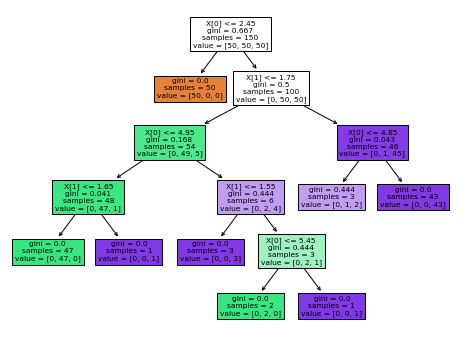

In [23]:
from sklearn import tree
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
tree.plot_tree(decision_tree, filled=True)

## Critical Analysis

Compare the accuracy score from the first Decision Tree to the accuracy score after you performed the grid search. How does it differ? It is most likely that you will find the accuracy score has decreased.  Is that what you had expected?  We perform a round of grid searching in order to elucidate the optimal hyperparameter values.  Why, then, has the accuracy score decreased?  Most importantly, what caused this decrease in the accuracy score and why?  Explain your answer.

DecisionTreeClassifier has an accuracy score of 1.0. <p>
GridSearchCV has an accuracy score of 0.8666. <p>

GridSearchCV results are biased on teh specific data set that is used, and on specific partitioning to training and validation folds. There is always the possibility for dusing different CV partitioning of the same data, and I will end up with different "best values" for the hyperparametesr used especially with an unstable classifier such as a decision tree. 
